# Multigraph Representation Learning

There are 

## Multiple Adjacency Spectral Embedding

Multiple Adjacency Spectral Embedding (MASE) is an extension of Adjacency Spectral Embedding (see ASE tutorial) for an arbitrary number of graphs. Once graphs are embedded, the low-dimensional Euclidean representation can be used to visualize the latent positions of vertices, perform inference, etc.

The general idea of MASE is to take a bunch of graphs, embed them with Adjacency Spectral Embedding, and then combine those embeddings into a single matrix and re-embed the combined matrix. 

**figure explaining the above**

We sample two 2-block SBMs (undirected, no self-loops) with 50 vertices, each block containing 25 vertices (𝑛=[25,25]), and with the following block connectivity matrices:

𝐵1=[0.30.10.10.7], 𝐵2=[0.30.10.10.3]

The only difference between the two is the within-block probability for the second block. We sample 𝐺1∼SBM(𝑛,𝐵1) and 𝐺2∼SBM(𝑛,𝐵2).

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from graspologic.embed import AdjacencySpectralEmbed as ASE
from graspologic.simulations import sbm

n = [500, 500]
p = np.array([[0.03, 0.015],
              [0.015, 0.03]])
graphs = []
labels = 0
for i in range(10):
    if not np.any(labels):
        g, labels = sbm(n, p, return_labels=True)
    else:
        g = sbm(n, p)
    graphs.append(g)
    


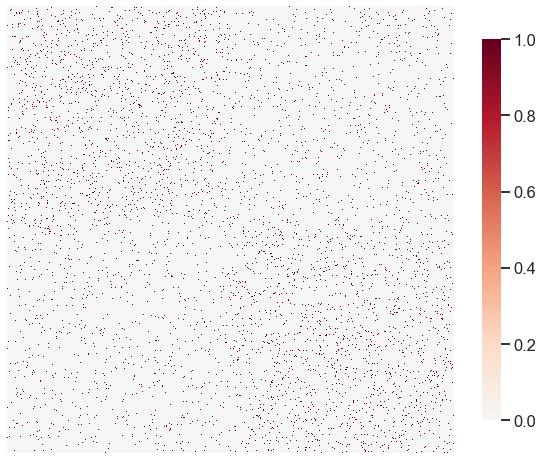

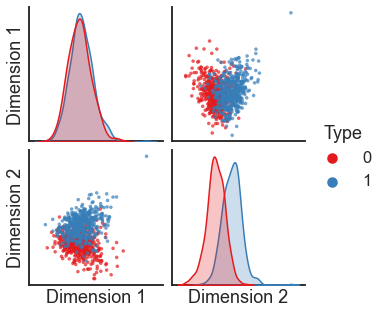

In [34]:
from graspologic.plot import gridplot, heatmap

heatmap(graphs[0])
ase = ASE(n_components=2)
latents = ase.fit_transform(graphs[0])
pairplot(latents, labels=labels)

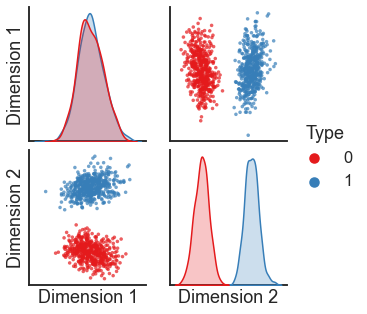

In [35]:
from graspologic.embed import MultipleASE as MASE
from graspologic.plot import pairplot

mase = MASE(n_components=2)
latents = mase.fit_transform(graphs)
pairplot(latents, labels=labels)
